In [199]:
import numpy as np
from numba import njit

import matplotlib.pyplot as plt
import time

In [161]:
@njit
def get_N_primes(N):
    '''
    N (int > 1): how many of the first prime numbers to return.
    '''
    
    sieve = np.full(N+1, True)
    
    i = 2
    while (i * i <= N):
        if sieve[i]:
            for j in range(i*i, N+1, i):
                sieve[j] = False
        i += 1
    return sieve    

In [200]:
def get_N_primes_no_njit(N):
    '''
    N (int > 1): how many of the first prime numbers to return.
    '''
    
    sieve = np.full(N+1, True)
    
    i = 2
    while (i * i <= N):
        if sieve[i]:
            
            
            for j in range(i*i, N+1, i):
                sieve[j] = False
        i += 1
    return sieve    

In [135]:
def get_N_primes(N):
    '''
    N (int > 1): how many of the first prime numbers to return.
    '''
    
    sieve = np.full(N+1, True)
    
    i = 2
    while i*i < N:
        if sieve[i]:
            
            #j = i**2
            #n = 0
            #while j <= N:
            #    print(j)
            for j in range(i*i, N+1, i):
                #sieve[j] = False
                sieve[j] = False
                #j += i
                #n += 1
                #j = i**2 #+ n*i
    i += 1
    for i in range(2, N+1):
        if sieve[i]:
            print(i)
    return sieve    

In [157]:
sieve = get_N_primes(100)
for i in range(2, 100+1):
        if sieve[i]:
            print(i)
print(np.sum(sieve)-2)

2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97
25


In [235]:
times_njit = []
times_no_njit = []
for N in range(2, 100000):
    t0_njit = time.time()
    get_N_primes(N)
    t1_njit = time.time()
    
    # t0_no_njit = time.time()
    # get_N_primes_no_njit(N)
    # t1_no_njit = time.time()
    
    times_njit.append(t1_njit - t0_njit)
    #times_no_njit.append(t1_no_njit - t0_no_njit)

In [239]:
def time_complexity(N, a):
    return a * N * np.log(np.log(N))
    

In [240]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(time_complexity, x_axis, times_njit)

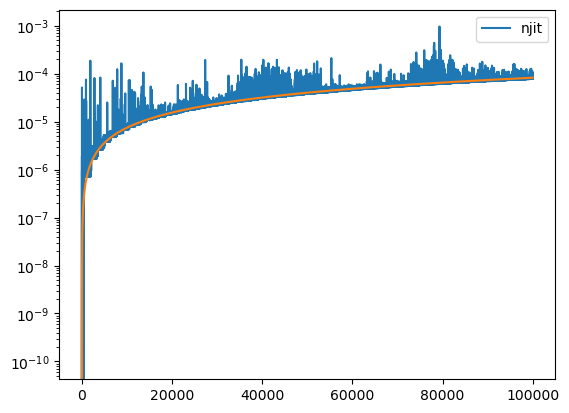

In [244]:
fig, ax = plt.subplots()
x_axis = np.arange(2, 100000)

ax.plot(x_axis, times_njit, label='njit')
ax.plot(x_axis, time_complexity(x_axis, popt[0]))
#ax.plot(x_axis, times_no_njit, label='no njit')

ax.set_yscale('log')
ax.legend()

In [162]:
sieve = get_N_primes(100000000)
print(np.sum(sieve)-2)

5761455


In [193]:
primes = np.nonzero(sieve[:10000])

In [198]:
primes[0][2:]

array([   2,    3,    5, ..., 9949, 9967, 9973])

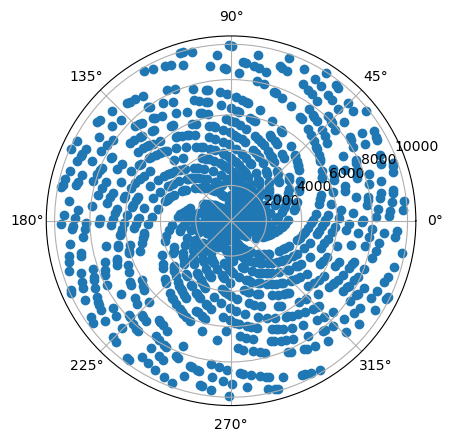

In [245]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.scatter(primes, primes)